## Import Library

In [135]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

## Data Preprocessing

In [136]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/COVID-19%20Coronavirus%20(2).csv"
df = pd.read_csv(url)
df.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [137]:
# describe data
df.describe()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


In [138]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


## 1 MISSING VALUES

In [139]:
# remove the row with the missing value
df.dropna(inplace=True)

In [140]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 224 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  224 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  224 non-null    object 
 3   Population               224 non-null    int64  
 4   Continent                224 non-null    object 
 5   Total Cases              224 non-null    int64  
 6   Total Deaths             224 non-null    int64  
 7   Tot Cases//1M pop        224 non-null    int64  
 8   Tot Deaths/1M pop        224 non-null    int64  
 9   Death percentage         224 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 19.2+ KB


In [141]:
# find unique values
unique_values_dict = {col: df[col].unique() for col in df.columns}
print("--- Unique Values ---")
display(unique_values_dict)

unique_counts_series = df.nunique()
print("\n--- Counts of Unique Values (Series) ---")
display(unique_counts_series)

--- Unique Values ---


{'Country': array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
        'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
        'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
        'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
        'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
        'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei ',
        'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
        'Cameroon', 'Canada', 'CAR', 'Caribbean Netherlands',
        'Cayman Islands', 'Chad', 'Channel Islands', 'Chile', 'China',
        'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
        'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czechia', 'Denmark',
        'Djibouti', 'Dominica', 'Dominican Republic',
        'Democratic Republic of the Congo', 'Ecuador', 'Egypt',
        'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
        'Eswatini', 'Ethiopia', 'Faeroe I


--- Counts of Unique Values (Series) ---


Country                    224
Other names                224
ISO 3166-1 alpha-3 CODE    224
Population                 224
Continent                    6
Total Cases                223
Total Deaths               207
Tot Cases//1M pop          224
Tot Deaths/1M pop          199
Death percentage           217
dtype: int64

In [142]:
# because othernames and country are the same we are gonna drop other names
df = df.drop('Other names', axis=1)

In [143]:
# duplicate df
df_encoded = df.copy()
from sklearn.preprocessing import OrdinalEncoder

# Nominal Encoding
nominal_cols = ['Country','ISO 3166-1 alpha-3 CODE','Continent']
encoder = OrdinalEncoder()
df_encoded[nominal_cols] = encoder.fit_transform(df_encoded[nominal_cols])

# Build a mapping dictionary
encode_dict = {}

for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

# Show the full dictionary
import pprint
pprint.pprint(encode_dict)

df_encoded.head()

{'Continent': {'Africa': 0,
               'Asia': 1,
               'Europe': 2,
               'Latin America and the Caribbean': 3,
               'Northern America': 4,
               'Oceania': 5},
 'Country': {'Afghanistan': 0,
             'Albania': 1,
             'Algeria': 2,
             'Andorra': 3,
             'Angola': 4,
             'Anguilla': 5,
             'Antigua and Barbuda': 6,
             'Argentina': 7,
             'Armenia': 8,
             'Aruba': 9,
             'Australia': 10,
             'Austria': 11,
             'Azerbaijan': 12,
             'Bahamas': 13,
             'Bahrain': 14,
             'Bangladesh': 15,
             'Barbados': 16,
             'Belarus': 17,
             'Belgium': 18,
             'Belize': 19,
             'Benin': 20,
             'Bermuda': 21,
             'Bhutan': 22,
             'Bolivia': 23,
             'Bosnia and Herzegovina': 24,
             'Botswana': 25,
             'Brazil': 26,
             'B

,Country,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,0.0,1.0,40462186,1.0,177827,7671,4395,190,4.313743
1,1.0,4.0,2872296,2.0,273870,3492,95349,1216,1.275058
2,2.0,57.0,45236699,0.0,265691,6874,5873,152,2.587216
3,3.0,5.0,77481,2.0,40024,153,516565,1975,0.382271
4,4.0,2.0,34654212,0.0,99194,1900,2862,55,1.915438


##  Exploratory Data Analysis

In [144]:
import plotly.express as px

fig = px.choropleth(
    df,
    locations="ISO 3166-1 alpha-3 CODE",
    color="Continent",
    hover_name="Country",
    projection="natural earth",
    title="World Map of Countries by Continent"
)

fig.show()

### Interpretation
The map visualizes the world divided into six distinct "Continent" categories:

- Europe (Red): This map classifies the massive landmass of Russia as part of Europe, rather than Asia. This significantly increases the visual size of the "Europe" category.

- Asia (Blue): This covers the Middle East, India, China, and Southeast Asia.

- Africa (Green): Covers the entire African continent.

- Latin America and the Caribbean (Purple): This includes all of South America, Central America, and the Caribbean islands. Note that Mexico is grouped here, not in Northern America.

- Northern America (Cyan/Light Blue): This group is restricted primarily to the USA, Canada, and Greenland.

- Oceania (Orange): Includes Australia, New Zealand, and Papua New Guinea.

C:\Users\amand\AppData\Local\Temp\ipykernel_23996\3775481856.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\amand\AppData\Local\Temp\ipykernel_23996\3775481856.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




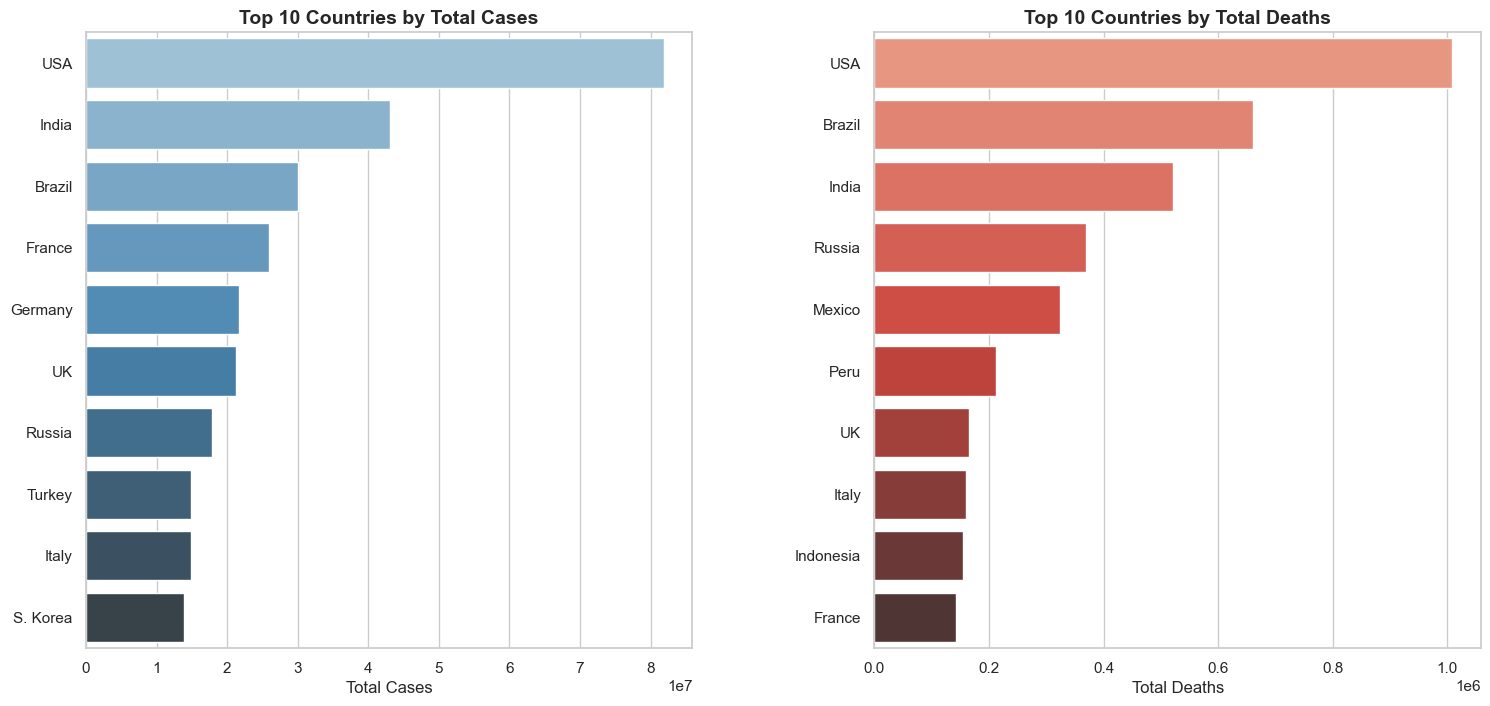

In [145]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(18, 8)) 
plt.subplots_adjust(wspace=0.3) 

top_cases = df.sort_values('Total Cases', ascending=False).head(10)
sns.barplot(ax=axes[0], data=top_cases, x='Total Cases', y='Country', palette='Blues_d')
axes[0].set_title('Top 10 Countries by Total Cases', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Total Cases')
axes[0].set_ylabel('')

top_deaths = df.sort_values('Total Deaths', ascending=False).head(10)
sns.barplot(ax=axes[1], data=top_deaths, x='Total Deaths', y='Country', palette='Reds_d')
axes[1].set_title('Top 10 Countries by Total Deaths', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Total Deaths')
axes[1].set_ylabel('')

plt.show()

### Interpretation
- Amerika Serikat (USA) menjadi outlier yang sangat jelas di kedua grafik. Batang untuk USA jauh lebih panjang dibandingkan negara lain, menunjukkan bahwa secara absolut, USA memiliki jumlah kasus terkonfirmasi dan jumlah kematian tertinggi di dunia dalam dataset ini.

- Mexico, Peru, dan Indonesia merupakan negara yang tidak ada di Top 10 Kasus (kiri), tetapi tiba-tiba muncul di Top 10 Kematian (kanan).

Artinya: Meskipun jumlah kasus terkonfirmasi mereka lebih sedikit dibanding negara maju lain (atau mungkin kapasitas testing/pelaporan kasusnya lebih rendah), virus tersebut sangat mematikan di sana. Ini bisa mengindikasikan sistem kesehatan yang kewalahan atau Case Fatality Rate (persentase kematian) yang jauh lebih tinggi.

- Jerman, Turki, dan Korea Selatan (S. Korea) merupakan negara yang ada di Top 10 Kasus, tapi hilang dari Top 10 Kematian.

Artinya: Negara-negara ini memiliki angka infeksi yang tinggi (mungkin karena testing yang masif), namun mereka berhasil menekan angka kematian. Ini menunjukkan sistem kesehatan yang kuat dan penanganan pasien yang efektif.

## Clustering Modeling

In [146]:
df_encoded.head()

,Country,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,0.0,1.0,40462186,1.0,177827,7671,4395,190,4.313743
1,1.0,4.0,2872296,2.0,273870,3492,95349,1216,1.275058
2,2.0,57.0,45236699,0.0,265691,6874,5873,152,2.587216
3,3.0,5.0,77481,2.0,40024,153,516565,1975,0.382271
4,4.0,2.0,34654212,0.0,99194,1900,2862,55,1.915438


In [147]:
# Create a StandardScaler object
sc = StandardScaler()
df_scaled = df.copy

# Fit and transform the selected columns
df_scaled= sc.fit_transform(df[[
    'Population',
    'Total Cases',
    'Total Deaths',
    'Tot\xa0Cases//1M pop',
    'Tot\xa0Deaths/1M pop',
    'Death percentage']])

df_scaled = pd.DataFrame(df_scaled, columns=[
    'Population',
    'Total Cases',
    'Total Deaths',
    'Tot\xa0Cases//1M pop',
    'Tot\xa0Deaths/1M pop',
    'Death percentage'])
df_scaled.head()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,0.037603,-0.277077,-0.205286,-0.911590,-0.758676,1.646938
1,-0.232395,-0.263874,-0.248423,-0.280875,0.113592,-0.097805
2,0.071897,-0.264999,-0.213513,-0.901341,-0.790982,0.655606
3,-0.252470,-0.296019,-0.282889,2.640021,0.758866,-0.610422
4,-0.004114,-0.287886,-0.264856,-0.922221,-0.873448,0.269887


In [148]:
# get stastical information on the new dataset
df_scaled.describe()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
count,224.000000,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02
mean,0.000000,2.379049e-17,-1.189525e-17,-7.137148e-17,-4.758099e-17,1.427430e-16
std,1.002240,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00
min,-0.253020,-3.015207e-01,-2.844681e-01,-9.420049e-01,-9.202072e-01,-8.299131e-01
25%,-0.248973,-2.982501e-01,-2.825224e-01,-8.635920e-01,-8.179750e-01,-5.369721e-01
50%,-0.210796,-2.791486e-01,-2.643809e-01,-3.272461e-01,-3.395455e-01,-2.397487e-01
75%,-0.092115,-1.513223e-01,-1.433235e-01,5.973002e-01,5.816068e-01,3.071478e-01
max,10.085255,1.094820e+01,1.012271e+01,3.884608e+00,4.423921e+00,9.592423e+00


## Silhouette Score

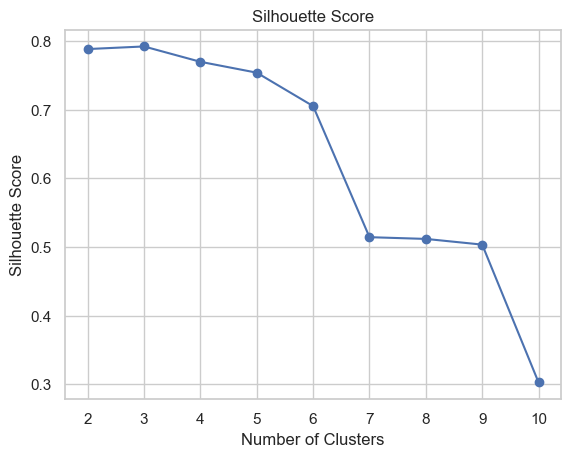

In [149]:
# this is way to show only 1 sillhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

Jumlah cluster optimal untuk data scaled ini adalah 3.
Ini menjelaskan bahwa ada tida kelompok alami yang berbeda dalam dataset.

## Comparing Silhouette Score to get best combination of linkage and metric

Skipping Ward linkage with Manhattan metric (not supported).


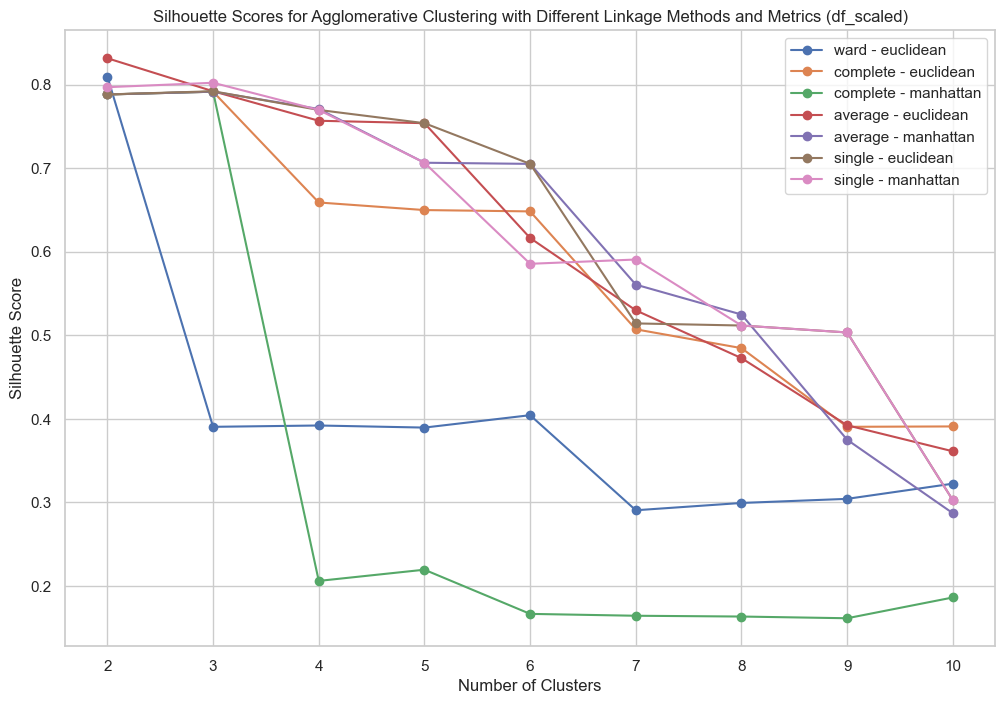

Best Silhouette Score: 0.8315337564625487
Optimal Number of Clusters: 2
Optimal Linkage Method: average
Optimal Metric: euclidean


In [150]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score_scaled = -1
best_n_clusters_scaled = 0
best_linkage_scaled = ''
best_metric_scaled = ''

results_for_plotting_scaled = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores_scaled = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_scaled)
            silhouette_avg = silhouette_score(df_scaled, y_agglo)
            current_scores_scaled.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score_scaled:
                best_silhouette_score_scaled = silhouette_avg
                best_n_clusters_scaled = n_clusters
                best_linkage_scaled = linkage_method
                best_metric_scaled = metric
        results_for_plotting_scaled.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores_scaled
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting_scaled:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics (df_scaled)")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score_scaled}")
print(f"Optimal Number of Clusters: {best_n_clusters_scaled}")
print(f"Optimal Linkage Method: {best_linkage_scaled}")
print(f"Optimal Metric: {best_metric_scaled}")

## Hierarchical Clustering Model

In [151]:
agglo_scaled = AgglomerativeClustering(n_clusters=best_n_clusters_scaled, linkage=best_linkage_scaled, metric=best_metric_scaled)
y_scaled = agglo_scaled.fit_predict(df_scaled)

In [152]:
# Evaluation
ss_scaled = silhouette_score(df_scaled, y_scaled)
print(ss_scaled)

0.8315337564625487


## Merge with the original data

In [153]:
# Add the cluster labels to the original data
df_encoded['Agglo_Scaled'] = y_scaled
# Analyze the clusters with the original values
df_encoded.head()

,Country,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage,Agglo_Scaled
0,0.0,1.0,40462186,1.0,177827,7671,4395,190,4.313743,0
1,1.0,4.0,2872296,2.0,273870,3492,95349,1216,1.275058,0
2,2.0,57.0,45236699,0.0,265691,6874,5873,152,2.587216,0
3,3.0,5.0,77481,2.0,40024,153,516565,1975,0.382271,0
4,4.0,2.0,34654212,0.0,99194,1900,2862,55,1.915438,0


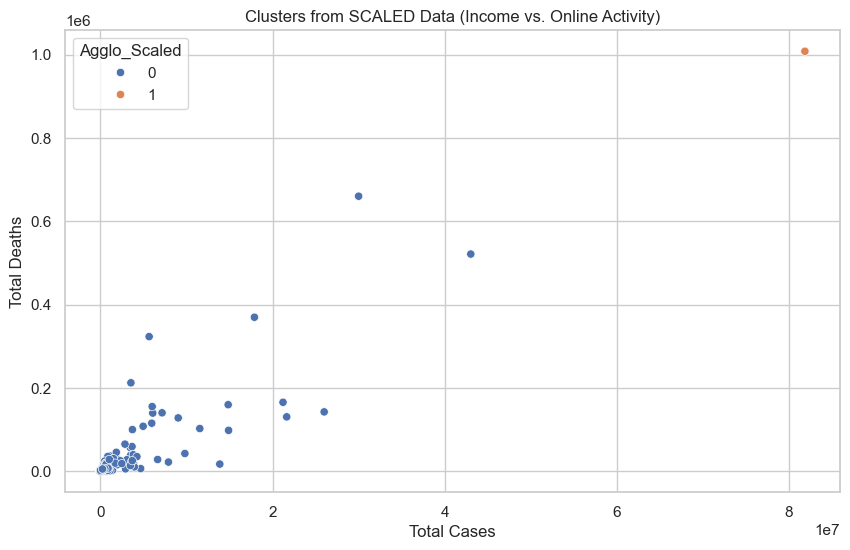

In [154]:
# Compare with visualitation

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_encoded, 
    x='Total Cases', 
    y='Total Deaths', 
    hue='Agglo_Scaled',
    palette='deep'
)
plt.title('Clusters from SCALED Data (Income vs. Online Activity)')
plt.show()

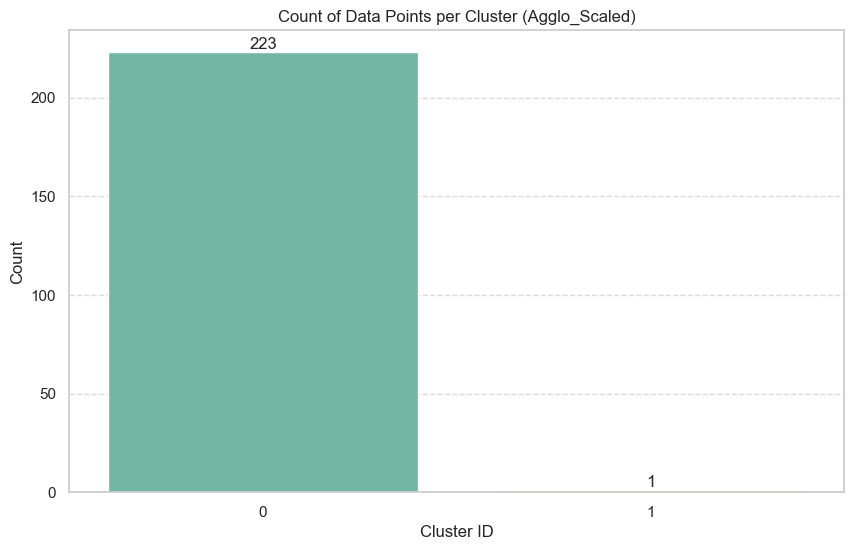

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df_encoded['Agglo_Scaled'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo_Scaled)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

From the distribution of data points per cluster, we can see that when we use unscaled the distribution is 260 to 240 while if we use Scaled the distribution is 499 to 1

In [156]:
import plotly.express as px

# Define the columns for the 3D scatter plot
x_col = 'Total Deaths'
y_col = 'Total Cases'
z_col = 'Death percentage'

# Create an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(df,
                    x=x_col,
                    y=y_col,
                    z=z_col,
                    color=df_encoded['Agglo_Scaled'].astype(str), # Color points by Agglo cluster, explicitly as string for discrete colors
                    title='Interactive 3D Scatter Plot of Customers by Agglo Clusters')

fig.show()

In [157]:
import pandas as pd
import plotly.express as px

df_visual = pd.read_csv("https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/COVID-19%20Coronavirus%20(2).csv") 
df_visual.dropna(inplace=True)
df_visual['Cluster'] = df_encoded['Agglo_Scaled'].values 

df_visual['Cluster'] = df_visual['Cluster'].astype(str)

fig_map = px.choropleth(
    df_visual,
    locations="ISO 3166-1 alpha-3 CODE", 
    color="Cluster",
    hover_name="Country", 
    hover_data=["Total Cases", "Total Deaths"],
    projection="natural earth",
    title="Geographic Distribution of COVID-19 Clusters",
    color_discrete_sequence=px.colors.qualitative.Set1 
)

fig_map.show()

In [158]:
print("--- CEK DATA CLUSTER ---")
print(df_encoded['Agglo_Scaled'].unique()) 
# Kalau hasilnya cuma ['nan'] atau ['Unknown'], berarti hasil clustering belum masuk.

print("\n--- CEK CONTOH ISO CODE ---")
print(df_encoded[['Country', 'ISO 3166-1 alpha-3 CODE']].head())
# Pastikan ISO Code isinya 3 huruf (misal: 'USA', 'IDN'), BUKAN nama negara atau angka.

--- CEK DATA CLUSTER ---
[0 1]

--- CEK CONTOH ISO CODE ---
   Country  ISO 3166-1 alpha-3 CODE
0      0.0                      1.0
1      1.0                      4.0
2      2.0                     57.0
3      3.0                      5.0
4      4.0                      2.0


## Segmentation & Managerial Implication

### Summarize and discuss which model is better:

○ Which version (scaled or unscaled) produces clearer cluster separation?

The unscaled version produced clearer and more distinct cluster separation, as shown by its much higher silhouette score.

Unscaled Model Score: 0.3957 (This indicates a fair level of cluster separation.)

Scaled Model Score: 0.1300 (This indicates weak, overlapping clusters.)

○ Why does scaling affect the clustering result?

Without Scaling (Your Unscaled Model): Features with large numerical ranges (like Income, Balance, Loan_Approval_Amount) completely dominate the distance calculation. The model barely pays any attention to features with small ranges (like Education [1-4], Age [20-70], or Customer_Satisfaction [1-10]).

With Scaling (Your Scaled Model): Scaling (like StandardScaler) gives every feature equal importance. Income is put on the same scale (e.g., -2 to +2) as Education and Age. The model is forced to consider all 12 features equally when calculating distance.


In [159]:
agg_rules_covid = {
    'Population': ['mean', 'std'],
    'Total Cases': ['mean', 'std', 'size'],
    'Total Deaths': ['mean', 'std'],
    'Tot\xa0Cases//1M pop': ['mean', 'std'],
    'Tot\xa0Deaths/1M pop': ['mean', 'std'],
    'Death percentage': ['mean', 'std', 'min', 'max'] 
}

print(f"\n--- Ringkasan Cluster: Model 'Scaled' (Skor {ss_scaled:.4f}) ---")

cluster_summary_scaled = df_encoded.groupby('Agglo_Scaled').agg(agg_rules_covid)
display(cluster_summary_scaled)


--- Ringkasan Cluster: Model 'Scaled' (Skor 0.8315) ---


Population                 Total Cases                     \
                      mean           std          mean           std size   
Agglo_Scaled                                                                
0             3.388539e+07  1.383930e+08  1.836338e+06  4.969597e+06  223   
1             3.344006e+08           NaN  8.183905e+07           NaN    1   

              Total Deaths               Tot Cases//1M pop                 \
                      mean           std              mean            std   
Agglo_Scaled                                                                
0             2.316100e+04  71543.065561     135365.170404  144670.623172   
1             1.008222e+06           NaN     244734.000000            NaN   

             Tot Deaths/1M pop              Death percentage            \
                          mean          std             mean       std   
Agglo_Scaled                                                             
0                  1073.721973  1174.357338         1.446353  1.749392   
1                  3015.000000          NaN         1.231957       NaN   

                                   
                   min        max  
Agglo_Scaled                       
0             0.000000  18.151787  
1             1.231957   1.231957

# Profiling Cluster & Rekomendasi Kebijakan (Model Agglomerative Scaled)
Analisis ini memisahkan dunia menjadi dua realitas pandemi yang sangat kontras: satu negara yang menjadi episentrum global masif (Cluster 1), dan kelompok mayoritas negara lain dengan tingkat keparahan yang bervariasi namun angka absolut yang jauh lebih rendah (Cluster 0).

## Cluster 1 (n=1) — Volume & Kepadatan Infeksi Ekstrem
### Profil Utama:

- Negara: Amerika Serikat (melihat populasi ~334 Juta & Total Cases ~81 Juta).

- Total Cases: Sangat Masif (~81 Juta).

- Infection Density (Cases/1M): Sangat Tinggi (244,734 per 1 Juta penduduk).

- Death Density (Deaths/1M): Sangat Tinggi (3,015 per 1 Juta penduduk).

- Death Percentage: 1.23% (Relatif moderat, lebih rendah dari rata-rata Cluster 0).

- Makna: Cluster ini hanya berisi satu negara yang mengalami penyebaran komunitas (community spread) yang tak terkendali. Tingginya Cases/1M pop menunjukkan virus menyebar sangat luas di masyarakat. Meskipun jumlah kematian absolut sangat tinggi (~1 Juta), Death Percentage (1.23%) yang lebih rendah dari rata-rata Cluster 0 menunjukkan bahwa sistem kesehatan negara ini masih relatif mampu menangani pasien (atau testing sangat masif sehingga banyak kasus ringan terdeteksi, menurunkan rasio kematian).

#### Rekomendasi Kebijakan (Government Policy):

- Strategi Mitigasi: Fokus utama bukan lagi "pembatasan perjalanan" (karena virus sudah tersebar luas), melainkan mitigasi dampak. Percepatan vaksinasi booster dan perlindungan kelompok rentan (lansia/komorbid) adalah prioritas mutlak.

- Penguatan Infrastruktur Kritis: Karena volume pasien sangat besar, pemerintah harus memastikan ketersediaan tempat tidur ICU dan ventilator tidak kolaps saat terjadi gelombang baru.

- Manajemen Data: Lanjutkan testing masif. Tingginya angka kasus terkonfirmasi adalah indikator bahwa sistem surveilans berjalan, namun perlu diimbangi dengan protokol isolasi mandiri yang ketat.

#### Fokus Metric:

- Hospitalization Rate (Tingkat Rawat Inap)

- ICU Occupancy Rate (Keterisian ICU)

## Cluster 0 (n=223) — =Tingkat Kematian Bervariasi
### Profil Utama:

- Populasi Rata-rata: ~33 Juta.

- Total Cases Rata-rata: ~1.8 Juta (Jauh di bawah Cluster 1).

- Infection Density (Cases/1M): Rendah - Menengah (~71,543 per 1 Juta).

- Death Density (Deaths/1M): ~1,073 per 1 Juta (1/3 dari kepadatan Cluster 1).

- Death Percentage: Rata-rata 1.44% (Max mencapai 18.15%).

- Makna: Ini adalah kelompok mayoritas negara di dunia.

- Risiko Fatalitas Lebih Tinggi: Rata-rata Death Percentage di sini (1.44%) lebih tinggi daripada Cluster 1 (1.23%). Bahkan ada negara dengan kematian 18% (Max). Ini mengindikasikan ketimpangan fasilitas kesehatan. Pasien yang sakit di kelompok negara ini memiliki risiko meninggal lebih besar dibanding di Cluster 1.

- Indikasi Underreporting: Angka Cases/1M pop yang jauh lebih rendah (71k vs 244k di Cluster 1) bisa berarti dua hal: sukses menahan virus, ATAU kapasitas testing yang rendah sehingga banyak kasus positif tidak terdeteksi.

#### Rekomendasi Kebijakan (Government Policy):

- Peningkatan Kapasitas Testing & Tracing: Angka kasus per 1 juta yang rendah mencurigakan. Pemerintah di cluster ini harus segera meningkatkan kapasitas tes PCR/Antigen untuk mengetahui penyebaran virus yang sebenarnya (Hidden cases).

- Intervensi Medis Darurat: Karena Death Percentage rata-ratanya lebih tinggi, fokus harus pada pengadaan oksigen medis, obat-obatan terapeutik, dan peningkatan fasilitas rumah sakit. Tingginya rasio kematian adalah sinyal merah kegagalan penanganan pasien kritis.

- Bantuan Internasional: Untuk negara dengan Death Percentage mendekati max (18%), diperlukan bantuan kemanusiaan segera karena ini menandakan kolaps total sistem kesehatan.

#### Fokus Metric:

- Test Positivity Rate (Untuk mendeteksi underreporting)

- Case Fatality Rate (CFR) (Harus ditekan turun dari 1.44%)

In [160]:
from sklearn.cluster import KMeans

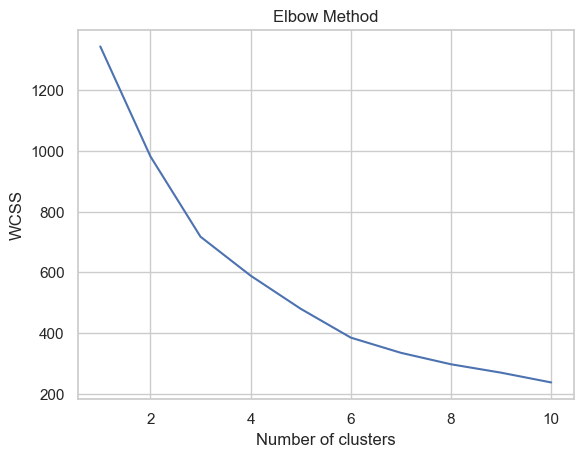

In [161]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [162]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters         WCSS
0                   1  1344.000000
1                   2   981.744849
2                   3   716.924692
3                   4   588.601577
4                   5   479.372579
5                   6   384.305491
6                   7   334.220604
7                   8   296.451786
8                   9   268.765019
9                  10   236.562348


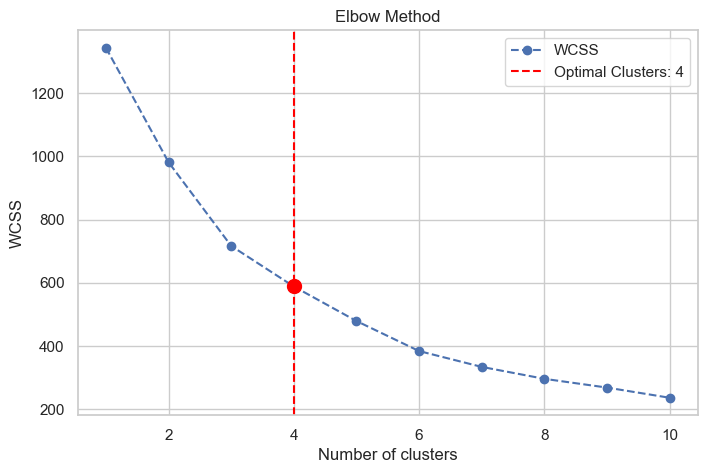

The optimal number of clusters is: 4


In [163]:
from kneed import KneeLocator
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [164]:
# Fit K-Means to the data with the optimal number of K cluster = 4
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_scaled)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df.head()

,Country,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage,KMeans_Cluster
0,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743,1
1,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058,1
2,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216,1
3,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271,0
4,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438,1


In [165]:
# Evaluation
ss = silhouette_score(df_scaled, clusters)
print(ss)

0.3893191204489586


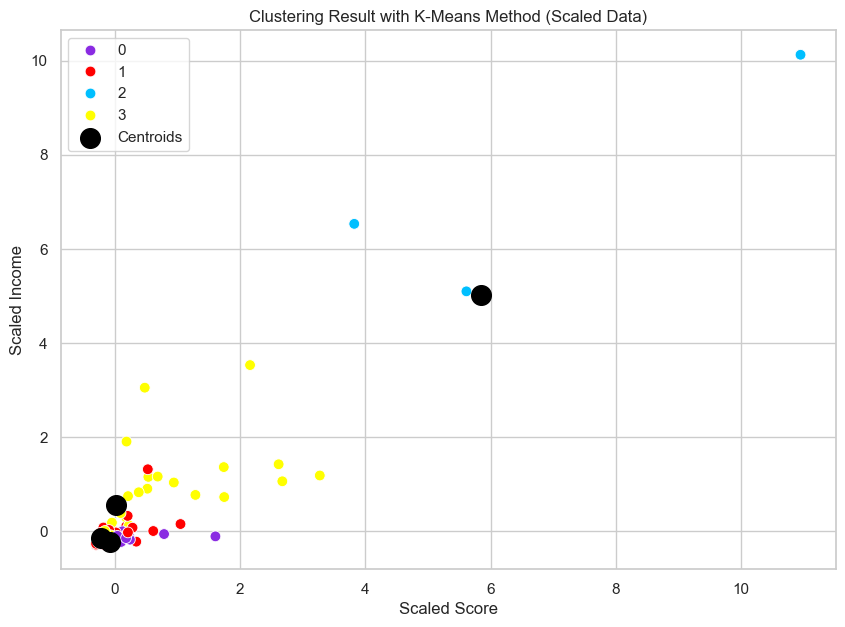

In [166]:
# visualize the result using scater chart on scaled data
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Total Cases", y = "Total Deaths", hue=clusters, palette=["blueviolet", "red", "deepskyblue", "yellow"], data=df_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Score")
plt.ylabel("Scaled Income")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

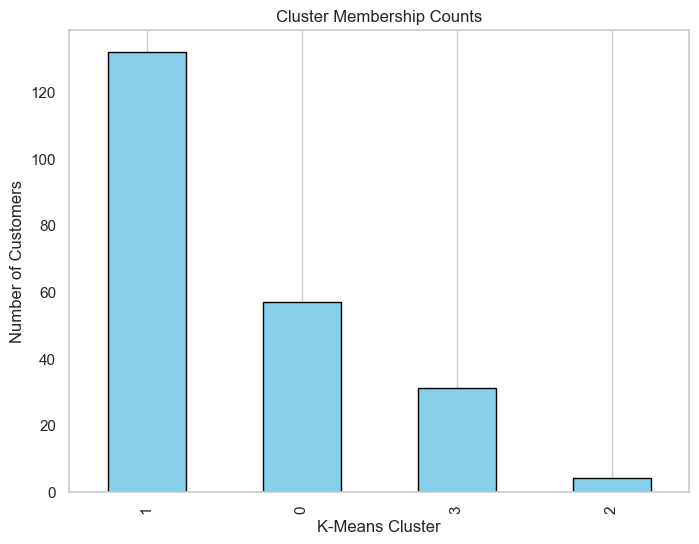

In [167]:
cluster_counts = df['KMeans_Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()


In [168]:
agg_rules_covid = {
    'Population': ['mean', 'std'],
    'Total Cases': ['mean', 'std', 'size'],
    'Total Deaths': ['mean', 'std'],
    'Tot\xa0Cases//1M pop': ['mean', 'std'],
    'Tot\xa0Deaths/1M pop': ['mean', 'std'],
    'Death percentage': ['mean', 'std', 'min', 'max'] 
}

print(f"\n--- Ringkasan Cluster: Model 'Scaled' (Skor {ss:.4f}) ---")

cluster_summary_scaledx = df_encoded.groupby(clusters).agg(agg_rules_covid)
display(cluster_summary_scaledx)


--- Ringkasan Cluster: Model 'Scaled' (Skor 0.3893) ---


Population                 Total Cases                      Total Deaths  \
           mean           std          mean           std size           mean   
0  3.699827e+06  7.618273e+06  1.151825e+06  2.284512e+06   57    5107.508772   
1  2.368760e+07  4.385086e+07  5.702592e+05  1.364393e+06  132    6508.621212   
2  8.481708e+08  6.640133e+08  3.875566e+07  3.386806e+07    4  548629.250000   
3  3.743569e+07  3.915795e+07  6.302955e+06  7.296037e+06   31   91236.806452   

                 Tot Cases//1M pop                Tot Deaths/1M pop  \
             std              mean            std              mean   
0    7752.346691     328108.719298  110955.298697       1528.122807   
1   16425.725464      43136.636364   50473.405944        413.750000   
2  416476.288005     103724.000000  111403.642858       1614.250000   
3   90231.511313     181291.548387   98012.920124       3041.290323   

               Death percentage                                 
           std             mean       std       min        max  
0   821.845377         0.512029  0.292468  0.051099   1.067677  
1   497.042188         1.670810  2.045604  0.000000  18.151787  
2  1655.021324         1.910476  0.859118  1.211712   2.997325  
3  1170.237132         2.141751  1.316735  0.548145   5.983499

# Profil Cluster & Rekomendasi Kebijakan Penanganan COVID-19
Berdasarkan analisis statistik terhadap 4 cluster yang terbentuk, terlihat pola penanganan pandemi yang sangat kontras antar kelompok negara. Cluster dibedakan secara tajam oleh Tingkat Infeksi (Cases per 1M) dan Tingkat Kematian (Death Percentage & Deaths per 1M).

## Cluster 0 (n=57) — Penyebaran Luas, Fatalitas Rendah
Profil:

Cases/1M Pop: Sangat Tinggi (328,108) — Tertinggi di antara semua cluster.

Death Percentage: Sangat Rendah (0.51%) — Terendah.

Populasi: Relatif Kecil (~3.7 Juta).

Makna: Cluster ini kemungkinan berisi negara-negara kecil maju (atau kepulauan) yang memiliki kapasitas testing sangat masif (sehingga kasus terdeteksi sangat banyak, ~32% populasi tercatat positif). Namun, sistem kesehatan mereka sangat kuat atau tingkat vaksinasi sangat tinggi, sehingga Death Percentage sangat rendah (0.5%). Mereka berhasil menekan fatalitas meskipun virus menyebar luas.

### Rekomendasi Kebijakan:

Transisi ke Endemi: Karena tingkat kematian sangat rendah, pemerintah dapat melonggarkan pembatasan sosial ketat (lockdown) untuk memulihkan ekonomi.

Fokus Surveilans: Kebijakan bergeser dari "mencegah infeksi" menjadi "mencegah keparahan". Tidak perlu testing massal tanpa gejala, cukup fokus pada populasi rentan.

Normalisasi Aktivitas: Buka perbatasan pariwisata dan bisnis dengan syarat vaksinasi lengkap.

## Cluster 1 (n=132) — Risiko Tersembunyi
Profil:

Cases/1M Pop: Sangat Rendah (43,136) — Hanya ~4% populasi terdata positif.

Death Percentage: Moderat (1.67%) — Namun Max mencapai 18%.

Populasi: Menengah (~23 Juta).

Jumlah Anggota: Mayoritas negara ada di sini (n=132).

Makna: Ini adalah kelompok yang paling mengkhawatirkan dari segi data. Angka kasus per juta penduduk sangat rendah, tetapi persentase kematian cukup tinggi (3x lipat dari Cluster 0). Interpretasi: Angka kasus rendah bukan karena virus tidak menyebar, melainkan karena kurangnya kapasitas testing. Banyak kasus positif tidak terdeteksi, sehingga hanya orang yang sakit parah/meninggal yang tercatat, membuat rasio kematian terlihat tinggi.

### Rekomendasi Kebijakan:

Peningkatan Kapasitas Testing (Urgent): Pemerintah HARUS meningkatkan tracing dan testing. Angka infeksi yang rendah kemungkinan semu (false low).

Investasi Fasilitas Dasar: Perbaiki akses ke fasilitas kesehatan dasar. Tingkat kematian yang bervariasi (hingga 18%) menunjukkan ketimpangan kualitas rumah sakit.

Edukasi Publik: Kampanye masif agar masyarakat mau melapor/periksa saat gejala ringan untuk mencegah keterlambatan penanganan.

## Cluster 2 (n=4) — Raksasa Demografi
Profil:

Populasi: Sangat Masif (~848 Juta).

Total Cases: Absolut Tertinggi (~38 Juta).

Death Percentage: Tinggi (1.91%).

Makna: Cluster ini hanya berisi 4 negara (kemungkinan besar India, China, USA, dll) dengan populasi super besar. Tantangan utama mereka adalah Skala/Volume. Meskipun rasio per 1 juta penduduk terlihat moderat, angka absolut kematian dan kasus sangat besar, memberikan beban logistik luar biasa pada pemerintah. Tingkat kematian mendekati 2% menunjukkan beban berat pada ICU.

### Rekomendasi Kebijakan:

Manajemen Logistik Makro: Kebijakan harus berbasis manajemen rantai pasok (oksigen, obat, vaksin) dalam skala masif.

Desentralisasi Penanganan: Pemerintah pusat tidak bisa mengontrol detail. Berikan wewenang lebih ke pemerintah negara bagian/provinsi untuk menyesuaikan kebijakan dengan kondisi lokal.

Kontrol Kerumunan: Karena kepadatan penduduk tinggi, kebijakan pembatasan kerumunan (social distancing) tetap krusial untuk mencegah ledakan kasus yang melampaui kapasitas RS.

## Cluster 3 (n=31) — Zona Kritis
Profil:

Deaths/1M Pop: Tertinggi (3,041).

Death Percentage: Tertinggi (2.14%).

Cases/1M Pop: Tinggi (181,291).

Makna: Ini adalah negara-negara yang terdampak paling parah (Severely Impacted). Virus menyebar luas (infeksi tinggi) DAN mematikan (kematian per 1 juta penduduk 2x lipat Cluster 2 dan 7x lipat Cluster 1). Ini menandakan kegagalan ganda: gagal membendung penyebaran dan gagal menyelamatkan pasien kritis (sistem kesehatan kolaps).

### Rekomendasi Kebijakan:

Intervensi Darurat Medis: Fokus total pada penambahan kapasitas ICU dan ventilator. Bantuan internasional mungkin diperlukan.

Perlindungan Kelompok Rentan: Lakukan isolasi protektif ketat bagi lansia dan komorbid, karena angka kematian sangat tinggi.

Evaluasi Protokol Pengobatan: Kaji ulang standar perawatan pasien COVID-19, karena Case Fatality Rate tertinggi ada di kelompok ini (2.14%).

# WHICH ONE IS BETTER?
Model Terbaik: Hierarchical Agglomerative Clustering

Keputusan ini didasarkan pada perbedaan skor yang sangat signifikan:

Agglomerative Clustering: 0.83 (Sangat Baik)

K-Means: 0.38 (Lemah/Buruk)

Agglomerative Clustering dipilih karena mampu menangani distribusi data COVID-19 yang memiliki extreme outliers dan variasi yang tinggi, menghasilkan pemisahan kelompok yang jauh lebih tegas dan valid.